# Libaries and Data

In [2]:
# Change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble

/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product/Ensemble


In [3]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Import predictions
df = pd.concat(map(pd.read_csv, ['predictions_prophet.csv',
                                 'predictions_sarimax.csv',
                                 'predictions_silverkite.csv',
                                 'predictions_lstm.csv']),
                  axis = 1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,Date,silverkite,Date,lstm
0,2021-01-01,724.480101,2021-01-01,739.874432,2192,2021-01-01,750.518503,2021-01-01,731.538966
1,2021-01-02,836.016157,2021-01-02,856.312084,2193,2021-01-02,833.825895,2021-01-02,862.598676
2,2021-01-03,754.639245,2021-01-03,767.567530,2194,2021-01-03,752.872797,2021-01-03,761.259599
3,2021-01-04,880.935735,2021-01-04,907.626374,2195,2021-01-04,896.849763,2021-01-04,910.333804
4,2021-01-05,750.931655,2021-01-05,779.803536,2196,2021-01-05,779.597889,2021-01-05,770.298379


In [10]:
# Fetch what we need
df = df[["ds","prophet", "sarimax","silverkite","lstm"]]
df.head(2)

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,724.480101,739.874432,750.518503,731.538966
1,2021-01-02,836.016157,856.312084,833.825895,862.598676


In [11]:
# index
df.index = df.pop('ds')
df.head(1)

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,724.480101,739.874432,750.518503,731.538966


# Ensemble


In [12]:
# Change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product


/content/drive/MyDrive/Time Series Forecasting Product/Forecasting Product


In [25]:
# getting the error
error_prophet = float(pd.read_csv("best_params_prophet.csv").iloc[4,1])
error_sarimax = pd.read_csv("best_params_sarimax.csv").iloc[6,1]
error_silverkite = float(pd.read_csv("best_params_silverkite.csv").iloc[0,1])
error_lstm = pd.read_csv("best_params_lstm.csv").iloc[7,1]

In [26]:
# average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm)/4
print(f"The average error is {average_error}")

The average error is 59.783931630787976


In [29]:
# Initial weights
weight_prophet = 0.25/ (error_prophet / average_error)
print(f" The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25/ (error_sarimax / average_error)
print(f" The Sarimax weight is {weight_sarimax}")

weight_silverkite = 0.25/ (error_silverkite / average_error)
print(f" The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25/ (error_lstm / average_error)
print(f" The LSTM weight is {weight_lstm}")

 The Prophet weight is 0.3113085665531846
 The Sarimax weight is 0.24928580282693266
 The Silverkite weight is 0.31267746668822166
 The LSTM weight is 0.17927221123018183


In [30]:
# Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding weights equals to {extra_weight}")

Adding weights equals to 1.0525440472985208


# Ensemble Forecast

In [34]:
# Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.sarimax * weight_sarimax + df.silverkite * weight_silverkite + df.lstm * weight_lstm) / extra_weight

<Axes: xlabel='ds'>

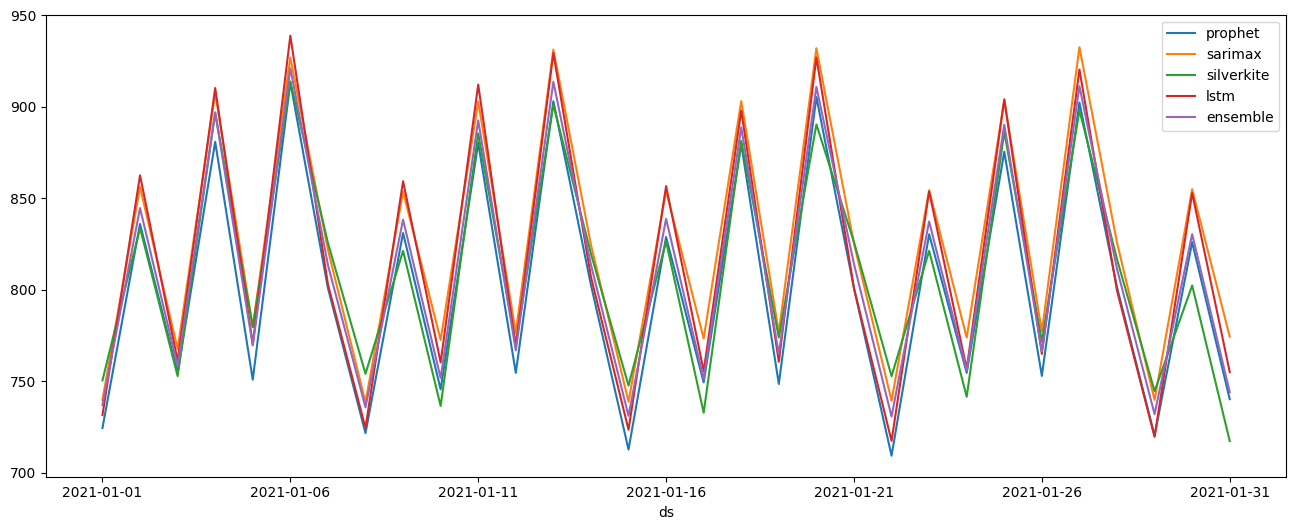

In [36]:
# Visualization
df.plot(figsize = (16,6), legend = True)